In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
df = pd.read_csv('HR_comma_sep.csv')

In [72]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [73]:
pd.isna(df).sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [74]:
df2 = df.drop(['Department', 'salary'], axis='columns')

In [75]:
df2.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


We can see that people who left are the one that have a lesser satisfaction level, have more monthly hours and have no promotion during the last 5 years

<Axes: xlabel='salary', ylabel='count'>

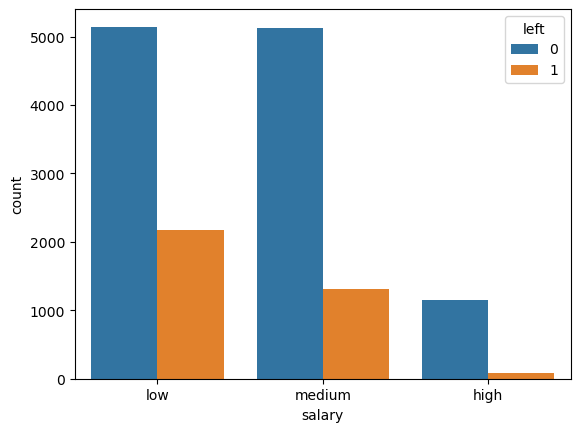

In [76]:
sns.countplot(x='salary', hue="left", data=df)

/tmp/ipykernel_35286/3777832223.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(x='Department', hue="left", data=df, order=df["Department"].value_counts().index).set_xticklabels(rotation=90, labels=df['Department'].unique())


[Text(0, 0, 'sales'),
 Text(1, 0, 'accounting'),
 Text(2, 0, 'hr'),
 Text(3, 0, 'technical'),
 Text(4, 0, 'support'),
 Text(5, 0, 'management'),
 Text(6, 0, 'IT'),
 Text(7, 0, 'product_mng'),
 Text(8, 0, 'marketing'),
 Text(9, 0, 'RandD')]

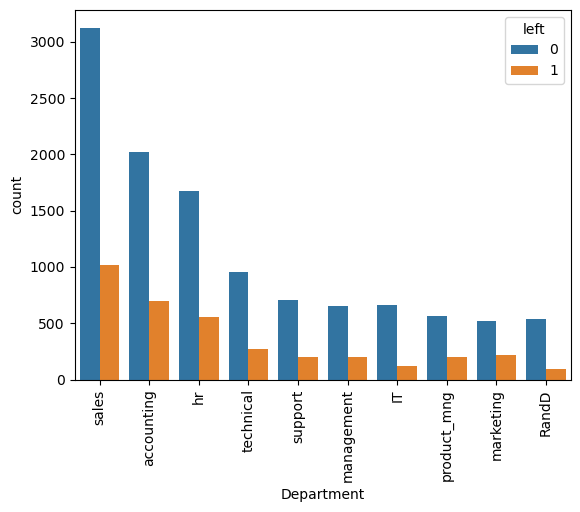

In [77]:
sns.countplot(x='Department', hue="left", data=df, order=df["Department"].value_counts().index).set_xticklabels(rotation=90, labels=df['Department'].unique())

In [78]:
df3 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [79]:
dummies = pd.get_dummies(df.salary)
df4 = pd.concat([df3, dummies], axis='columns')
df4.drop('salary', axis='columns', inplace=True)
df4.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [80]:
X = df4
y = df.left

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/mikhail/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
lr.score(X_test, y_test)

0.7768888888888889